In [1]:
import torch
import torchvision

In [2]:
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=False, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bbird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import cv2

rgb_images = []

for image, label in trainset:
    rgb_images.append(image)

In [4]:
a = rgb_images[1]
a.min()

tensor(1.00000e-02 *
       1.9608)

In [5]:
import numpy as np

numpy_lab_images = []

for rgb_image in rgb_images:
    numpy_rgb_image = np.transpose(rgb_image.numpy(), (1, 2, 0))
    numpy_lab_image = cv2.cvtColor(numpy_rgb_image, cv2.COLOR_RGB2LAB)
    numpy_lab_images.append(numpy_lab_image)

In [6]:
a =  numpy_lab_images[1]
a.max()

99.25537

In [7]:
a.min()

-23.71875

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow_unimage(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


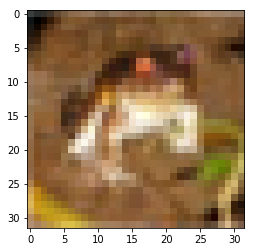

In [9]:
imshow_unimage(rgb_images[0])

In [10]:
lab_images = []

for numpy_lab_image in numpy_lab_images:
    numpy_lab_image[:, :, 0] *= 255 / 100
    numpy_lab_image[:, :, 1] += 128
    numpy_lab_image[:, :, 2] += 128
    numpy_lab_image /= 255
    torch_lab_image = torch.from_numpy(np.transpose(numpy_lab_image, (2, 0, 1)))
    lab_images.append(torch_lab_image)

In [11]:
len(lab_images)

50000

In [12]:
lab_image = lab_images[1]
lab_image.min()

tensor(1.00000e-02 *
       1.6846)

In [13]:
transform = transforms.Compose(
    [transforms.Grayscale(1),
    transforms.ToTensor()])

greytrainset = torchvision.datasets.CIFAR10(root='./grey_data', train=True,
                                        download=True, transform=transform)
greytrainloader = torch.utils.data.DataLoader(greytrainset, batch_size=4,
                                          shuffle=False, num_workers=2)

greytestset = torchvision.datasets.CIFAR10(root='./grey_data', train=False,
                                       download=True, transform=transform)
greytestloader = torch.utils.data.DataLoader(greytestset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
grey_images = []
for grey_image, label in greytrainset:
    grey_images.append(grey_image)

In [15]:
grey_images[3].min()

tensor(1.00000e-02 *
       4.7059)

In [16]:
# functions to show a greyscale image
def imgreyshow_unimage(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).reshape((32, 32)), cmap = 'gray')
    plt.show()

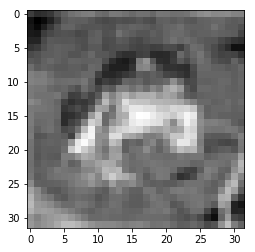

In [17]:
imgreyshow_unimage(grey_images[0])

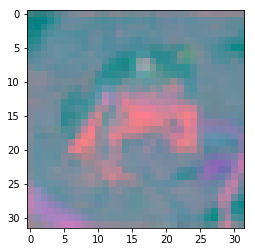

In [18]:
imshow_unimage(lab_images[0])

In [19]:
class GreyscaleDataset(torch.utils.data.Dataset):
    """Greyscale dataset."""    
        
    def __len__(self):
        return len(grey_images)

    def __getitem__(self, index):
        img, target = grey_images[index], lab_images[index]
        return img, target

In [20]:
greyscaleDataset = GreyscaleDataset()

In [21]:
image, label = greyscaleDataset[1]
image.min()

tensor(1.00000e-02 *
       2.3529)

In [22]:
def imshow(img):
    npimg = img.numpy()
    npimg = npimg / 2 + 0.5
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
def imgreyshow(img):
    npimg = img.numpy()
    npimg = npimg / 2 + 0.5
    plt.imshow(np.transpose(npimg, (1, 2, 0)).reshape((32, 32)), cmap = 'gray')
    plt.show()    

In [23]:
greyscaleloader = torch.utils.data.DataLoader(greyscaleDataset, batch_size=128,
                                          shuffle=True, num_workers=2)

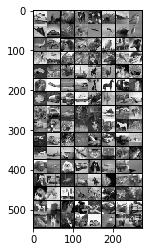

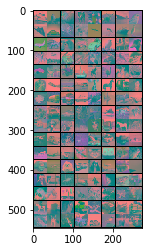

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File

In [24]:
# get some random training images
dataiter = iter(greyscaleloader)
images, labels = dataiter.next()

# show images
imshow_unimage(torchvision.utils.make_grid(images))
imshow_unimage(torchvision.utils.make_grid(labels))

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class UNet(nn.Module):
    
    def unet_conv(self, ch_in, ch_out, is_leaky):
        if is_leaky:
            return nn.Sequential(
                nn.Conv2d(ch_in, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.LeakyReLU(0.2),
                nn.Conv2d(ch_out, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.LeakyReLU(0.2)
            )
        else:
            return nn.Sequential(
                nn.Conv2d(ch_in, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.ReLU(),
                nn.Conv2d(ch_out, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.ReLU()
            )
        
    def up(self, ch_in, ch_out):
        return nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear'),
            nn.Conv2d(ch_in, ch_out, 1)
        )
    
    def __init__(self, is_leaky):
        super(UNet, self).__init__()
        
        # First encoding layer
        self.conv1 = self.unet_conv(1, 64, is_leaky)
        # Second encoding layer
        self.conv2 = self.unet_conv(64, 128, is_leaky)
        # Third encoding layer
        self.conv3 = self.unet_conv(128, 256, is_leaky)
        # Fourth encoding layer
        self.conv4 = self.unet_conv(256, 512, is_leaky)
        # Fifth encoding layer
        self.conv5 = self.unet_conv(512, 1024, is_leaky)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2)
        
        # First Upsampling layer
        self.up1 = self.up(1024, 512)
        # Second Upsampling layer
        self.up2 = self.up(512, 256)
        # Third Upsampling layer
        self.up3 = self.up(256, 128)
        # Fourth Upsampling layer
        self.up4 = self.up(128, 64)
        
        # First decoding layer
        self.conv6 = self.unet_conv(1024, 512, False)
        # Second decoding layer
        self.conv7 = self.unet_conv(512, 256, False)
        # Third decoding layer
        self.conv8 = self.unet_conv(256, 128, False)
        # Fourth decoding layer
        self.conv9 = self.unet_conv(128, 64, False)
        
        # Last layer
        self.conv10 = nn.Conv2d(64, 3, 1)

    def forward(self, x):
        # Encoding path
        x1 = self.conv1(x)
        x2 = self.conv2(self.pool(x1))
        x3 = self.conv3(self.pool(x2))
        x4 = self.conv4(self.pool(x3))
        x5 = self.conv5(self.pool(x4))
        
        # Decoding path
        x = self.conv6(torch.cat((x4, self.up1(x5)), 1))
        x = self.conv7(torch.cat((x3, self.up2(x)), 1))
        x = self.conv8(torch.cat((x2, self.up3(x)), 1))
        x = self.conv9(torch.cat((x1, self.up4(x)), 1))
        x = self.conv10(x)
        m = nn.Tanh()
        x = m(x)
        
        return x

In [26]:
# GAN's
# Discriminator
class DNet(nn.Module):
    
    def unet_conv(self, ch_in, ch_out):
        return nn.Sequential(
            nn.Conv2d(ch_in, ch_out, 3, padding=1),
            nn.BatchNorm2d(ch_out),
            nn.LeakyReLU(0.2),
            nn.Conv2d(ch_out, ch_out, 3, padding=1),
            nn.BatchNorm2d(ch_out),
            nn.LeakyReLU(0.2)
        )
    
    def __init__(self):
        super(DNet, self).__init__()
        
        # First layer
        self.conv1 = self.unet_conv(4, 64)
        # Second layer
        self.conv2 = self.unet_conv(64, 128)
        # Third layer
        self.conv3 = self.unet_conv(128, 256)
        # Fourth layer
        self.conv4 = self.unet_conv(256, 512)
        # Fifth layer
        self.conv5 = self.unet_conv(512, 1024)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2)
        
        # Last layer
        self.conv6 = nn.Linear(2 * 2 * 1024, 1)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(self.pool(x1))
        x3 = self.conv3(self.pool(x2))
        x4 = self.conv4(self.pool(x3))
        x5 = self.conv5(self.pool(x4))
        
        x6 = x5.view(-1, 2 * 2 * 1024)
        m = nn.Sigmoid()
        x = m(self.conv6(x6))
        
        return x

In [31]:
import torch.optim as optim

generator = UNet(True)
discriminator = DNet()

generator.cuda()
discriminator.cuda()

generator.load_state_dict(torch.load('home/cifar10_train_generator'))
discriminator.load_state_dict(torch.load('home/cifar10_train_discriminator'))

d_optimizer = optim.Adam(discriminator.parameters(), betas=(0.5, 0.999), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), betas=(0.5, 0.999), lr=0.0002)

In [32]:
d_criterion = nn.BCELoss()
g_criterion_1 = nn.BCELoss()
g_criterion_2 = nn.L1Loss()

In [33]:
from torch.autograd import Variable
from torch import cat

g_lambda = 100
smooth = 0.1

for epoch in range(200):  # loop over the dataset multiple times
    d_running_loss = 0.0
    g_running_loss = 0.0
    for i, data in enumerate(greyscaleloader, 0):
        gray_images, real_images = data
        
        mean = torch.Tensor([0.5])
        gray_images = gray_images - mean.expand_as(gray_images)
        gray_images = 2 * gray_images
        
        real_images = real_images - mean.expand_as(real_images)
        real_images = 2 * real_images
        
        batch_size = gray_images.shape[0]
        gray_images = Variable(gray_images.cuda())
        real_images = Variable(real_images.cuda())
        
        fake_images = generator(gray_images)
        
        # Train the discriminator
        d_optimizer.zero_grad()

        logits = discriminator(cat([gray_images, real_images], 1))
        d_real_loss = d_criterion(logits, ((1 - smooth) * torch.ones(batch_size)).cuda())
        d_real_loss.backward()

        logits = discriminator(cat([gray_images, fake_images], 1))
        d_fake_loss = d_criterion(logits, (torch.zeros(batch_size)).cuda())
        d_fake_loss.backward(retain_graph=True)

        d_optimizer.step()

        # Train the generator
        g_optimizer.zero_grad()

        fake_logits = discriminator(cat([gray_images, fake_images], 1))
        g_fake_loss = g_criterion_1(fake_logits, (torch.ones(batch_size)).cuda())
        g_fake_loss.backward(retain_graph=True)

        g_image_distance_loss = g_lambda * g_criterion_2(fake_images, real_images)
        g_image_distance_loss.backward()

        g_optimizer.step()
        
        d_loss = d_real_loss.item() + d_fake_loss.item()
        g_loss = g_fake_loss.item() + g_image_distance_loss.item()
        
        # print statistics
        d_running_loss += d_loss
        g_running_loss += g_loss
        if i % 10 == 0:    # print every 100 mini-batches
            print('[%d, %5d] d_loss: %.5f g_loss: %.5f' %
                  (epoch + 1, i + 1, d_running_loss / 10, g_running_loss / 10))
            d_running_loss = 0.0
            g_running_loss = 0.0
            
    torch.save(generator.state_dict(), 'home/cifar10_train_generator')
    torch.save(discriminator.state_dict(), 'home/cifar10_train_discriminator')
    
print('Finished Training')

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


[1,     1] d_loss: 0.03255 g_loss: 1.43023
[1,    11] d_loss: 0.48581 g_loss: 13.42943
[1,    21] d_loss: 1.22093 g_loss: 9.60790
[1,    31] d_loss: 0.59403 g_loss: 11.13943
[1,    41] d_loss: 0.92596 g_loss: 11.09934
[1,    51] d_loss: 0.43198 g_loss: 10.29784
[1,    61] d_loss: 0.68146 g_loss: 11.71922
[1,    71] d_loss: 0.44441 g_loss: 11.23599
[1,    81] d_loss: 0.41700 g_loss: 11.97902
[1,    91] d_loss: 0.35216 g_loss: 13.86107
[1,   101] d_loss: 0.32919 g_loss: 12.78940
[1,   111] d_loss: 0.32892 g_loss: 11.97000
[1,   121] d_loss: 0.32673 g_loss: 12.00551
[1,   131] d_loss: 0.32670 g_loss: 12.19081
[1,   141] d_loss: 0.32622 g_loss: 12.30107
[1,   151] d_loss: 0.32610 g_loss: 12.32655
[1,   161] d_loss: 0.32599 g_loss: 12.49989
[1,   171] d_loss: 0.32607 g_loss: 12.54424
[1,   181] d_loss: 0.32658 g_loss: 12.80045
[1,   191] d_loss: 0.32605 g_loss: 13.26280
[1,   201] d_loss: 0.32621 g_loss: 13.99678
[1,   211] d_loss: 0.32566 g_loss: 13.44619
[1,   221] d_loss: 0.32619 g_loss:

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


[1,   391] d_loss: 0.33322 g_loss: 11.80053
[2,     1] d_loss: 0.03285 g_loss: 1.14847
[2,    11] d_loss: 0.33909 g_loss: 11.41962
[2,    21] d_loss: 0.32871 g_loss: 11.45486
[2,    31] d_loss: 1.01844 g_loss: 10.88664
[2,    41] d_loss: 0.52732 g_loss: 8.80939
[2,    51] d_loss: 1.20504 g_loss: 8.51271
[2,    61] d_loss: 1.29996 g_loss: 8.17406
[2,    71] d_loss: 0.65270 g_loss: 7.31805
[2,    81] d_loss: 0.40204 g_loss: 8.66757
[2,    91] d_loss: 0.38840 g_loss: 9.88627
[2,   101] d_loss: 1.71402 g_loss: 7.51390
[2,   111] d_loss: 1.21283 g_loss: 6.91311
[2,   121] d_loss: 1.28049 g_loss: 7.26853
[2,   131] d_loss: 1.04607 g_loss: 7.70966
[2,   141] d_loss: 1.00112 g_loss: 8.71713
[2,   151] d_loss: 1.17175 g_loss: 8.27606
[2,   161] d_loss: 0.85362 g_loss: 8.73046
[2,   171] d_loss: 0.77199 g_loss: 9.71857
[2,   181] d_loss: 0.69215 g_loss: 9.21479
[2,   191] d_loss: 0.38872 g_loss: 9.84252
[2,   201] d_loss: 0.34761 g_loss: 10.41317
[2,   211] d_loss: 0.33606 g_loss: 10.83952
[2,  

[6,   261] d_loss: 0.32518 g_loss: 14.87193
[6,   271] d_loss: 0.32518 g_loss: 14.83782
[6,   281] d_loss: 0.32518 g_loss: 14.73004
[6,   291] d_loss: 0.32517 g_loss: 14.58055
[6,   301] d_loss: 0.32518 g_loss: 14.71604
[6,   311] d_loss: 0.32518 g_loss: 14.81948
[6,   321] d_loss: 0.32521 g_loss: 14.97497
[6,   331] d_loss: 0.32517 g_loss: 14.67996
[6,   341] d_loss: 0.32519 g_loss: 14.54709
[6,   351] d_loss: 0.32517 g_loss: 14.84457
[6,   361] d_loss: 0.32518 g_loss: 14.92265
[6,   371] d_loss: 0.32517 g_loss: 14.94739
[6,   381] d_loss: 0.32517 g_loss: 14.90563
[6,   391] d_loss: 0.32517 g_loss: 14.94187
[7,     1] d_loss: 0.03252 g_loss: 1.46545
[7,    11] d_loss: 0.32516 g_loss: 15.23250
[7,    21] d_loss: 0.32516 g_loss: 14.89399
[7,    31] d_loss: 0.32515 g_loss: 15.14283
[7,    41] d_loss: 0.32521 g_loss: 15.16540
[7,    51] d_loss: 0.32515 g_loss: 14.99796
[7,    61] d_loss: 0.32516 g_loss: 15.10130
[7,    71] d_loss: 0.32516 g_loss: 14.94590
[7,    81] d_loss: 0.32517 g_loss

Process Process-18:
Process Process-17:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/ubuntu/

KeyboardInterrupt: 

In [34]:
torch.save(generator.state_dict(), 'home/cifar10_train_generator')
torch.save(discriminator.state_dict(), 'home/cifar10_train_discriminator')

In [51]:
maxo = 1000000000
for i in range(0, len(grey_images)):
    a = grey_images[i]
    maxi = a.min()
    if maxi < maxo:
        maxo = maxi

In [52]:
maxo

tensor(0.)

In [43]:
def imlabshow(img):
    npimg = img.numpy()
    npimg = npimg / 2 + 0.5
    numpy_lab_image = np.transpose(npimg, (1, 2, 0))
    numpy_lab_image *= 255
    numpy_lab_image[:, :, 0] /= 255 / 100
    numpy_lab_image[:, :, 1] -= 128
    numpy_lab_image[:, :, 2] -= 128

    numpy_rgb_image = cv2.cvtColor(numpy_lab_image, cv2.COLOR_LAB2RGB)
    plt.imshow(numpy_rgb_image)
    plt.show()

In [44]:
def imfakeshow(img):
    npimg = img.detach().numpy()
    npimg = npimg / 2 + 0.5     # unnormalize
    numpy_lab_image = np.transpose(npimg, (1, 2, 0))
    numpy_lab_image *= 255
    numpy_lab_image[:, :, 0] /= 255 / 100
    numpy_lab_image[:, :, 1] -= 128
    numpy_lab_image[:, :, 2] -= 128

    numpy_rgb_image = cv2.cvtColor(numpy_lab_image, cv2.COLOR_LAB2RGB)
    plt.imshow(numpy_rgb_image)
    plt.show()

In [45]:
# get some random training images
dataiter = iter(greyscaleloader)
images1, images2 = dataiter.next()

mean = torch.Tensor([0.5])
images1 = images1 - mean.expand_as(images1)
images1 = 2 * images1
        
images2 = images2 - mean.expand_as(images2)
images2 = 2 * images2

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


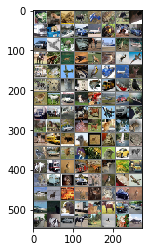

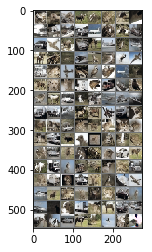

In [49]:
images3 = generator(Variable(images1.cuda()))

# show images
imlabshow(torchvision.utils.make_grid(images2))
imfakeshow(torchvision.utils.make_grid(images3.cpu()))

In [50]:
image = grey_images[1]
image.min()

tensor(1.00000e-02 *
       2.3529)

In [71]:
smallgreyscaleloader = torch.utils.data.DataLoader(greyscaleDataset, batch_size=8,
                                          shuffle=True, num_workers=2)

In [72]:
# get some random training images
dataiter = iter(smallgreyscaleloader)
images1, images2 = dataiter.next()

mean = torch.Tensor([0.5])
images1 = images1 - mean.expand_as(images1)
images1 = 2 * images1
        
images2 = images2 - mean.expand_as(images2)
images2 = 2 * images2

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


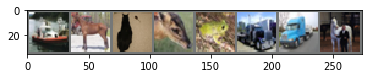

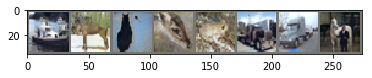

In [73]:
images3 = generator(Variable(images1.cuda()))

# show images
imlabshow(torchvision.utils.make_grid(images2))
imfakeshow(torchvision.utils.make_grid(images3.cpu()))

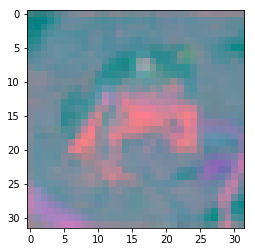

In [74]:
image1, image2 = greyscaleDataset[0]
imshow_unimage(image2)

In [75]:
image1 = grey_images[1]
image1.min()

tensor(1.00000e-02 *
       2.3529)

In [44]:
load_generator = UNet(True)
load_discriminator = DNet()
load_generator.load_state_dict(torch.load('home/cifar10_train_generator'))
load_discriminator.load_state_dict(torch.load('home/cifar10_train_discriminator'))

AttributeError: 'str' object has no attribute 'copy'